In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from shapely import wkt
import json


In [ ]:
# Read the CSV file
merged_data = pd.read_csv("full_df.csv")

# Ensure that the 'geometry' column is recognized as geometry
# Convert the 'geometry' column to geometrical objects if necessary
merged_data['geometry'] = gpd.GeoSeries.from_wkt(merged_data['geometry'])

# Convert to a GeoDataFrame
merged_data = gpd.GeoDataFrame(merged_data, geometry='geometry')

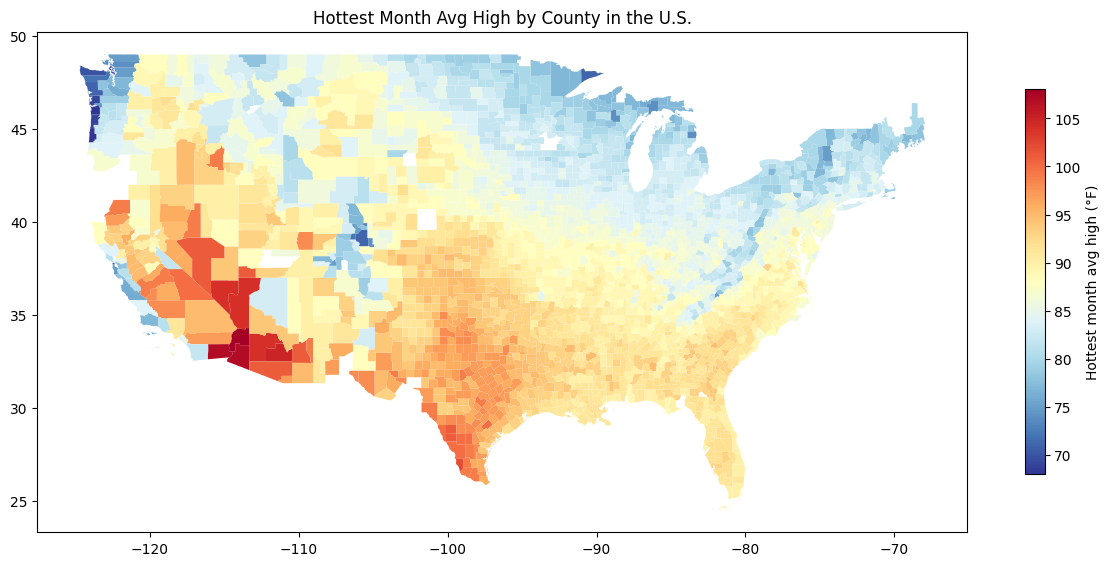

In [7]:
# Test Plot

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


column = "Hottest month's avg high (F)"

# Determine the range of temperature values
vmin = merged_data[column].min()
vmax = merged_data[column].max()
norm = Normalize(vmin=vmin, vmax=vmax)

# Use a diverging colormap such as 'RdYlBu'
cmap = 'RdYlBu_r'  # Reversed so that blue represents cooler temperatures and red represents warmer temperatures

merged_data.plot(column=column, ax=ax, cmap=cmap, norm=norm)

# Create a colorbar with the normalization
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.5)
cbar.set_label('Hottest month avg high (°F)')

aspect_ratio = 1.25  # For some reason, geopandas loses its ability to get the right aspect ratio when reading the file
ax.set_aspect(aspect_ratio)

plt.title('Hottest Month Avg High by County in the U.S.')
plt.show()

In [3]:
def get_user_preferences(file_path="preferences.json"):
    with open(file_path, 'r') as file:
        preferences = json.load(file)
    return preferences


# # Function to calculate a comfort score
# def calculate_comfort_score(df, preferences):
    
#     # Define weightings based on user preferences
#     weights = {
#         'temperature': preferences['importance_temperature'],
#         'humidity': preferences['importance_humidity'],
#         'sunshine': preferences['importance_sunshine'],
#         'rainfall': preferences['importance_rainfall'],
#         'snowfall': preferences['importance_snowfall'],
#         'uv_index': preferences['importance_uv_index']
#     }
    
#     # Calculate individual factor scores
#     df['temperature_score'] = 1 - np.abs(df['Hottest month\'s avg high (F)'] - preferences['preferred_summer_high']) / 100
#     df['temperature_score'] += 1 - np.abs(df['Coldest month\'s avg low (F)'] - preferences['preferred_winter_low']) / 50
    
#     if preferences['temperature_variation_tolerance'] == 'low':
#         df['temperature_score'] -= df['Hottest high minus coldest high'] / 100
#     elif preferences['temperature_variation_tolerance'] == 'moderate':
#         df['temperature_score'] -= df['Hottest high minus coldest high'] / 200
#     else:
#         df['temperature_score'] -= df['Hottest high minus coldest high'] / 300
    
#     humidity_map = {'low': 0.3, 'moderate': 0.6, 'high': 1.0}
#     df['humidity_score'] = 1 - np.abs(df['Summer Relative Humidity (afternoon)'] / 100 - humidity_map[preferences['preferred_summer_humidity']])
#     df['humidity_score'] += 1 - np.abs(df['Winter Relative Humidity (afternoon)'] / 100 - humidity_map[preferences['preferred_winter_humidity']])

    
#     df['sunshine_score'] = df['Annual Sunshine - Percentage of Possible'] / 100
#     if preferences['sun_preference'] == 'more sun':
#         df['sunshine_score'] += df['Summer Sunshine - Percentage of Possible'] / 100
#     else:
#         df['sunshine_score'] += df['Winter Sunshine - Percentage of Possible'] / 100
    
#     rainfall_map = {'low': 0.3, 'moderate': 0.6, 'high': 1.0}
#     df['rainfall_score'] = 1 - np.abs(df['Annual rainfall (in)'] / 100 - rainfall_map[preferences['annual_rainfall_preference']])
#     if preferences['rainfall_season_preference'] == 'summer':
#         df['rainfall_score'] += df['Summer rainfall (in)'] / 100
#     elif preferences['rainfall_season_preference'] == 'winter':
#         df['rainfall_score'] += df['Winter rainfall (in)'] / 100
    
#     df['snowfall_score'] = 1 - np.abs(df['Days of snow per year'] - preferences['snow_days_preference']) / 100
#     if preferences['enjoy_snow'] == 'yes':
#         df['snowfall_score'] += df['Annual snowfall (in)'] / 100
    
#     # uv_map = {'low': 0.3, 'moderate': 0.6, 'high': 1.0}
#     # df['uv_index_score'] = 1 - np.abs(df['Annual UV Index'] / 10 - uv_map[preferences['uv_tolerance']])
    
#     # Combine scores into a single comfort score
#     df['comfort_score'] = (
#         df['temperature_score'] * weights['temperature'] +
#         df['humidity_score'] * weights['humidity'] +
#         df['sunshine_score'] * weights['sunshine'] +
#         df['rainfall_score'] * weights['rainfall'] +
#         df['snowfall_score'] * weights['snowfall']
#     ) / sum(weights.values())
    
#     return df

# Get user preferences
user_preferences = get_user_preferences()

# Calculate comfort score
df_with_comfort_scores = calculate_comfort_score(merged_data, user_preferences)

# Display the DataFrame with comfort scores

df_with_comfort_scores.head(2)

,Unnamed: 0,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,State,...,UV Index,Latitude,Longitude,Winter Relative Humidity (afternoon),temperature_score,humidity_score,sunshine_score,rainfall_score,snowfall_score,comfort_score
0,0,1001,0500000US01001,1,1,autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",AL,...,5,32.479407,-86.462075,54.0,1.376667,1.5,1.20,0.97,0.91,1.045303
1,1,1009,0500000US01009,1,9,blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",AL,...,5,33.951228,-86.555218,53.0,1.306667,1.5,1.21,0.98,0.91,1.025303


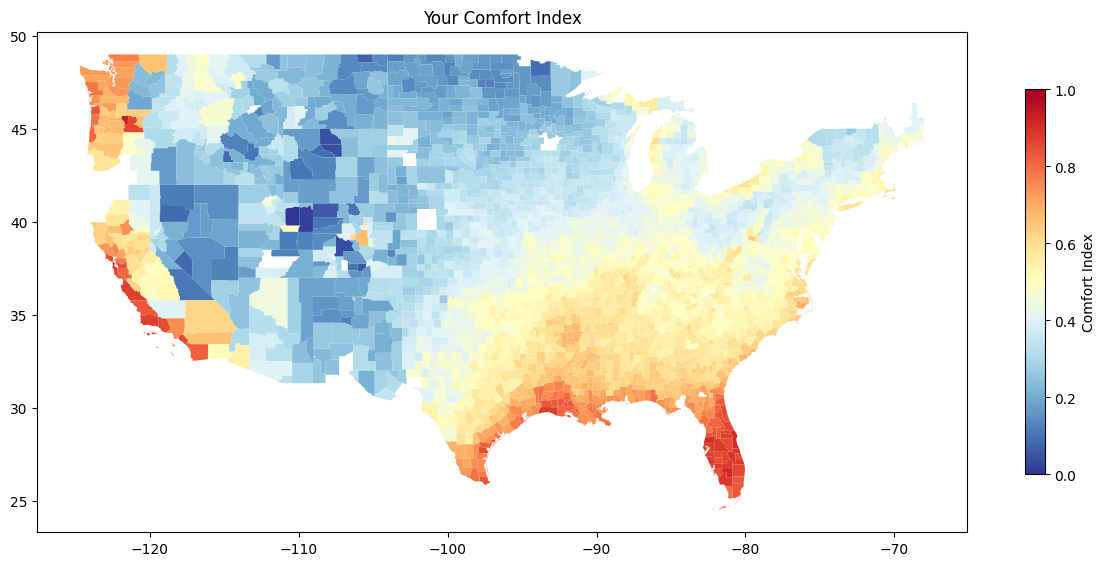

In [8]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

column = "comfort_score"

# # Determine the range of temperature values 
# vmin = df_with_comfort_scores[column].min()
# vmax = df_with_comfort_scores[column].max()
# norm = Normalize(vmin=vmin, vmax=vmax)

# Use a diverging colormap such as 'RdYlBu'
cmap = 'RdYlBu_r'  # Reversed so that blue represents cooler temperatures and red represents warmer temperatures

# df_with_comfort_scores.plot(column=column, ax=ax, cmap=cmap, norm=norm)
df_with_comfort_scores.plot(column=column, ax=ax, cmap=cmap)


# Create a colorbar with the normalization
# cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.5)
cbar = fig.colorbar(ScalarMappable(cmap=cmap), ax=ax, shrink=0.5)
cbar.set_label('Comfort Index')

aspect_ratio = 1.25  # For some reason, geopandas loses its ability to get the right aspect ratio when reading the file
ax.set_aspect(aspect_ratio)

plt.title('Your Comfort Index')
plt.show()